<a href="https://colab.research.google.com/github/ouissem11/App-pratique/blob/master/d%C3%A9fi02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df=pd.read_csv("/content/dataDefi2.csv.gz",sep=";")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,113303,63835,185,77.0,"26,82287414",0,African American,M,"172,7",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
1,100799,68271,6,19.0,"22,89090402",0,Asian,M,"167,6",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
2,97702,25893,77,49.0,"33,85575384",0,Caucasian,F,"167,6",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,66955,4599,19,52.0,"36,35802469",0,African American,F,180,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,90681,1541,132,83.0,"29,27783633",0,Caucasian,F,"152,4",Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82537,26716,6791,55,54.0,"29,35733473",1,Other/Unknown,M,"182,8",Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,0
82538,10009,33376,174,50.0,"23,02196161",0,Caucasian,M,"180,3",Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
82539,8410,110955,62,NaN,"19,33376648",0,Caucasian,F,"165,1",Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
82540,112003,96590,118,75.0,"18,90655055",0,Caucasian,M,"175,3",Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0


In [ ]:
df.info()

In [ ]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
percent_nan

gender                       0.027865
icu_admit_source             0.123573
d1_heartrate_max             0.152650
d1_heartrate_min             0.152650
d1_sysbp_min                 0.169611
                              ...    
apache_4a_icu_death_prob     8.687698
h1_mbp_noninvasive_min       9.894357
h1_mbp_noninvasive_max       9.894357
d1_potassium_max            10.427419
d1_potassium_min            10.427419
Length: 74, dtype: float64

In [ ]:
np.abs(df.corr()['hospital_death']).sort_values().tail(30)

apache_post_operative        0.082915
h1_heartrate_min             0.089140
apache_2_diagnosis           0.090241
elective_surgery             0.092895
d1_resprate_max              0.102894
h1_spo2_min                  0.108595
heart_rate_apache            0.109722
age                          0.110245
h1_resprate_min              0.111631
h1_heartrate_max             0.115020
h1_resprate_max              0.121797
h1_diasbp_min                0.123789
h1_diasbp_noninvasive_min    0.130963
h1_mbp_min                   0.140959
h1_sysbp_min                 0.145034
h1_mbp_noninvasive_min       0.147322
h1_sysbp_noninvasive_min     0.147523
d1_heartrate_max             0.164295
intubated_apache             0.175428
d1_diasbp_min                0.177627
d1_diasbp_noninvasive_min    0.177847
d1_mbp_min                   0.194940
d1_mbp_noninvasive_min       0.195137
d1_spo2_min                  0.209304
d1_sysbp_min                 0.210048
ventilated_apache            0.229540
gcs_verbal_a

In [ ]:
df1=df.loc[:,["age","bmi","elective_surgery",'icu_stay_type',"ethnicity","gender","apache_post_operative","arf_apache","aids","cirrhosis","diabetes_mellitus","hepatic_failure","leukemia","lymphoma","solid_tumor_with_metastasis","hospital_death","d1_diasbp_max","d1_heartrate_max","d1_heartrate_min","d1_resprate_max","d1_resprate_min","gcs_motor_apache","gcs_eyes_apache","gcs_verbal_apache","ventilated_apache","d1_sysbp_min","d1_spo2_min","d1_mbp_noninvasive_min","d1_diasbp_min"]]

In [ ]:
df1.columns

Index(['age', 'bmi', 'elective_surgery', 'icu_stay_type', 'ethnicity',
       'gender', 'apache_post_operative', 'arf_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_death', 'd1_diasbp_max',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_resprate_max',
       'd1_resprate_min', 'gcs_motor_apache', 'gcs_eyes_apache',
       'gcs_verbal_apache', 'ventilated_apache', 'd1_sysbp_min', 'd1_spo2_min',
       'd1_mbp_noninvasive_min', 'd1_diasbp_min'],
      dtype='object')

In [ ]:
df1['bmi']=df1['bmi'].str.replace(',','.').astype(float)

In [ ]:
df2=df1.dropna()

In [ ]:
df2['gender']= df2['gender'].map({'F': 1,'M': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3 = pd.get_dummies(df2, columns=['ethnicity'])

In [ ]:
df4 = pd.get_dummies(df3, columns=['icu_stay_type'])

In [ ]:
convert_dict = {'aids': int,
                'cirrhosis': int,
                'diabetes_mellitus': int,
                'hepatic_failure': int,
                'leukemia': int,
                'lymphoma': int,
                'solid_tumor_with_metastasis': int,
                'arf_apache': int
                }  
  
df4 = df4.astype(convert_dict)  
print(df4.dtypes)

age                            float64
bmi                            float64
elective_surgery                 int64
gender                           int64
apache_post_operative            int64
arf_apache                       int64
aids                             int64
cirrhosis                        int64
diabetes_mellitus                int64
hepatic_failure                  int64
leukemia                         int64
lymphoma                         int64
solid_tumor_with_metastasis      int64
hospital_death                   int64
d1_diasbp_max                  float64
d1_heartrate_max               float64
d1_heartrate_min               float64
d1_resprate_max                float64
d1_resprate_min                float64
gcs_motor_apache               float64
gcs_eyes_apache                float64
gcs_verbal_apache              float64
ventilated_apache              float64
d1_sysbp_min                   float64
d1_spo2_min                    float64
d1_mbp_noninvasive_min   

In [ ]:
df4['arf_apache'].unique()

array([0, 1])

In [ ]:
df4.columns

In [ ]:
df4=df4.drop(['ethnicity_Other/Unknown'], axis=1)

Créer une carte de chaleur (heatmap) qui affiche la corrélation entre toutes les colonnes.

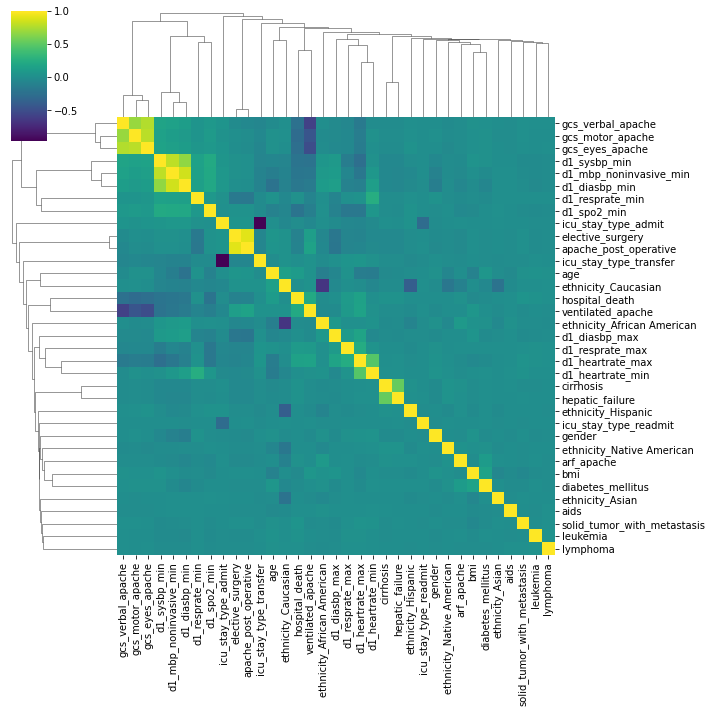

In [ ]:
sns.clustermap(df4.corr(),cmap='viridis');

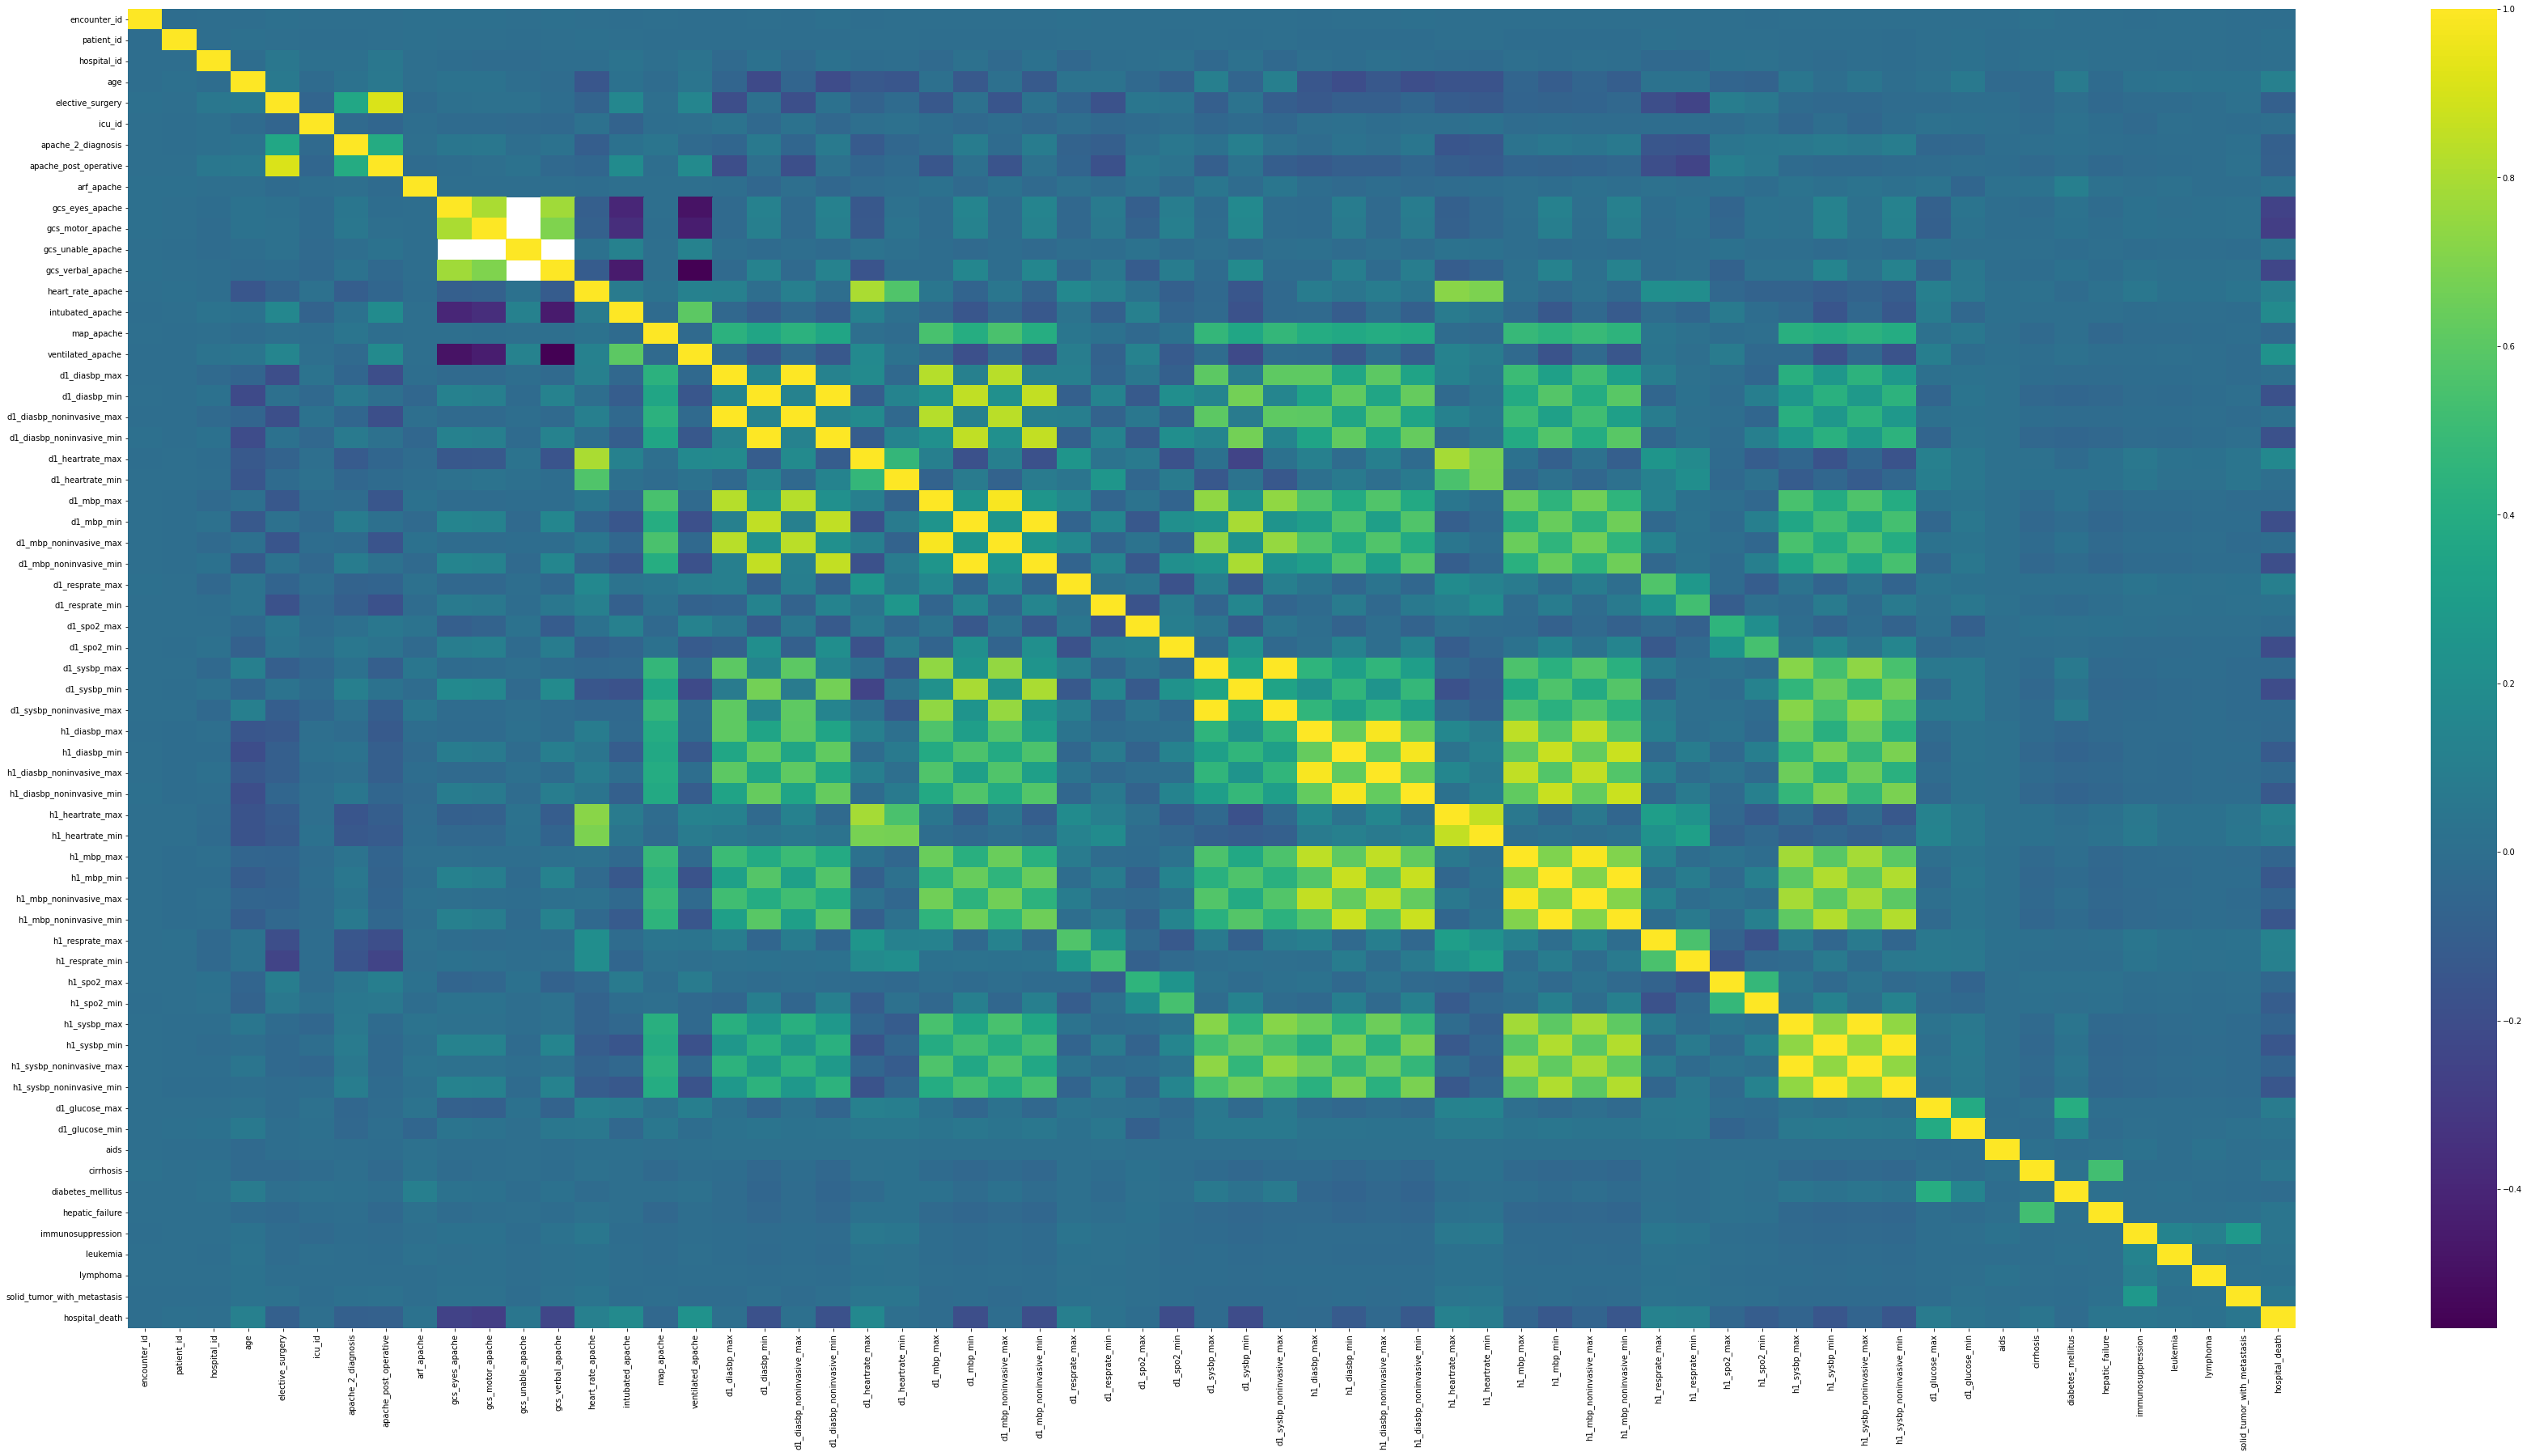

In [ ]:
plt.figure(figsize=(60,30))
sns.heatmap(df.corr(),cmap='viridis');

Créer un diagramme à barres qui montre le nombre total de comptages par valeur cible.


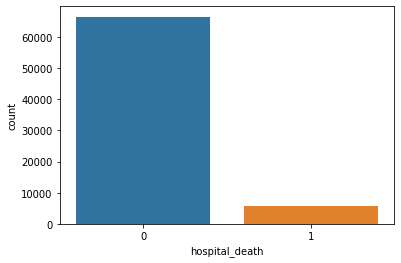

In [ ]:
sns.countplot(data=df4,x='hospital_death');

In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [ ]:
df_majority = df4[df4.hospital_death==0]
df_minority = df4[df4.hospital_death==1]

In [ ]:
(df_majority["hospital_death"] == 0).shape

(66503,)

In [ ]:
from sklearn.utils import resample

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=66503,    # to match majority class
                                 random_state=123) # reproducible results
 

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

Séparer les features des labels en 2 objets, X et y.

In [ ]:
X = df_upsampled.drop('hospital_death',axis=1)
y = df_upsampled['hospital_death']

 Effectuer un fractionnement Entraînement / Test sur les données, avec un test_size de 30% et un random_state de 101.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler

Créez un objet StandardScaler et normalisez les données des ensembles d'entraînement et de test

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modèle de régression Logistique

LogisticRegressionCV


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [ ]:
log_model.C_

array([0.00077426])

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Coefficients

In [ ]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [ ]:
coefs = coefs.sort_values()

In [ ]:
coefs

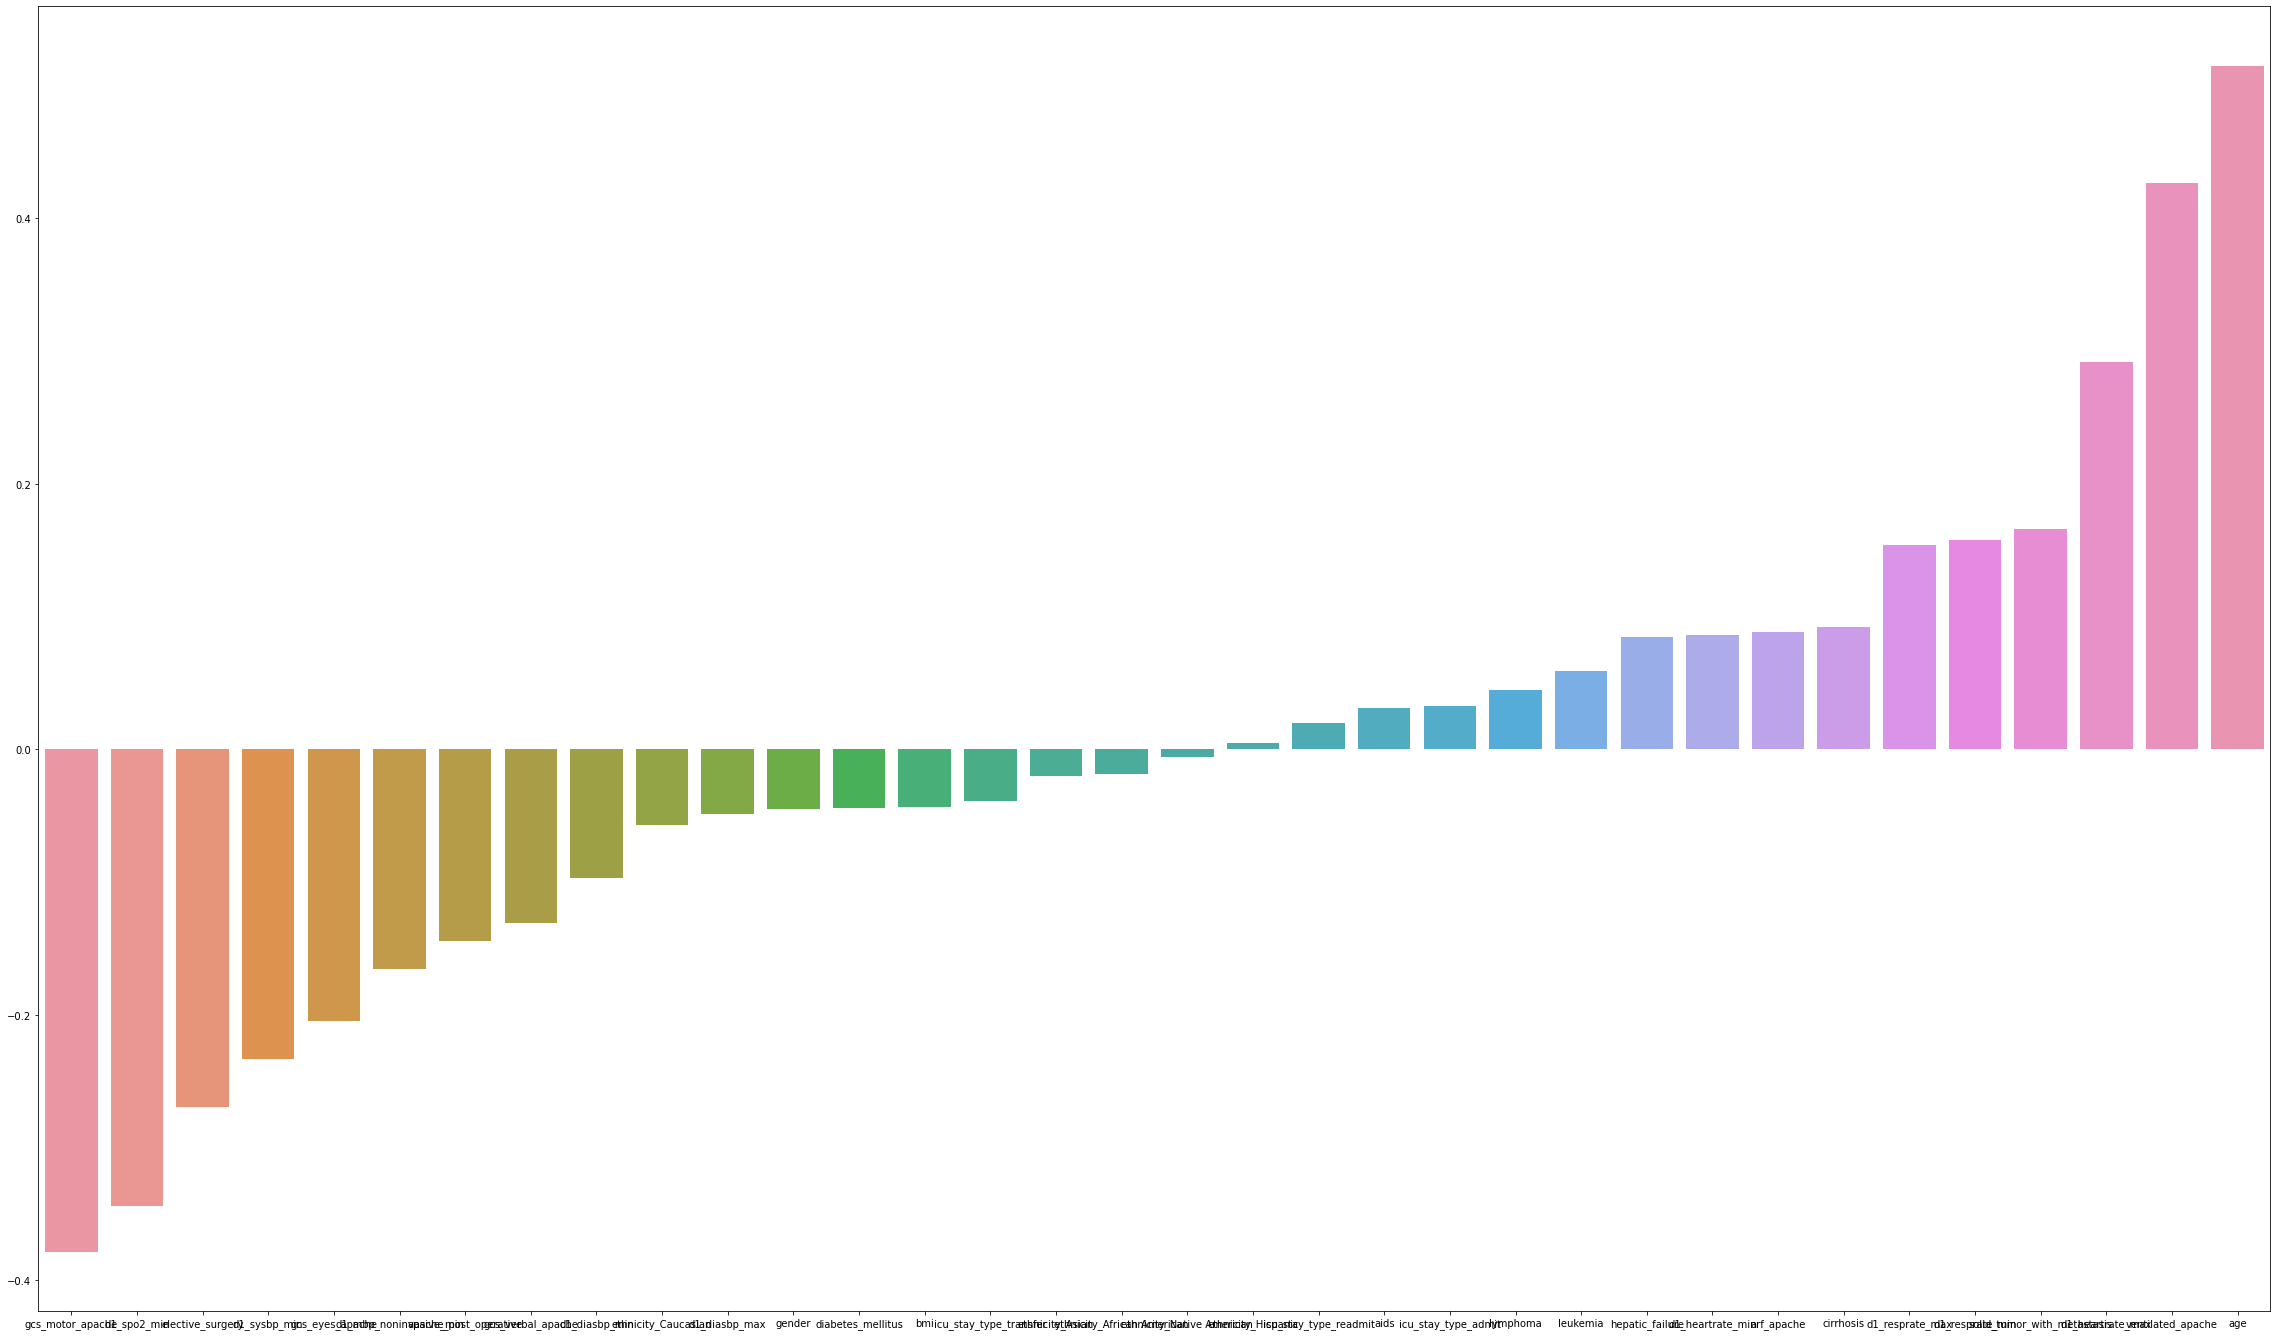

In [ ]:
plt.figure(figsize=(40,24))
sns.barplot(x=coefs.index,y=coefs.values);

## Évaluation de la performance du modèle


*   Tableau de la matrice de confusion
*   Tracé de la matrice de confusion
*  Rapport de classification






In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[15568,  4328],
       [ 4840, 15166]])

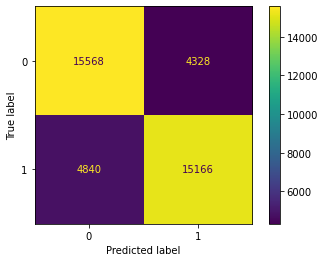

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     19896
           1       0.78      0.76      0.77     20006

    accuracy                           0.77     39902
   macro avg       0.77      0.77      0.77     39902
weighted avg       0.77      0.77      0.77     39902



## Courbes de Performance

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

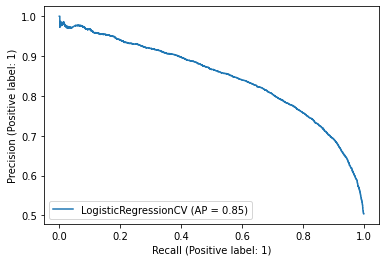

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

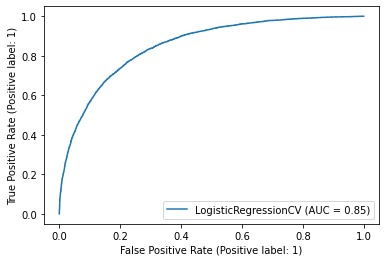

In [ ]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);